# Startup Profit Prediction

### Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading and undersatnding the data

## Importing the dataset

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


NO null values found!

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

From the above Observation I conclude that it is balanced set

# Data Visualization

## Exploratory Data Analysis

- Exploring various feautures present in the dataset for better understanding 

In [9]:
# Checking the null values 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- The dataset is cleaned and has no null values 

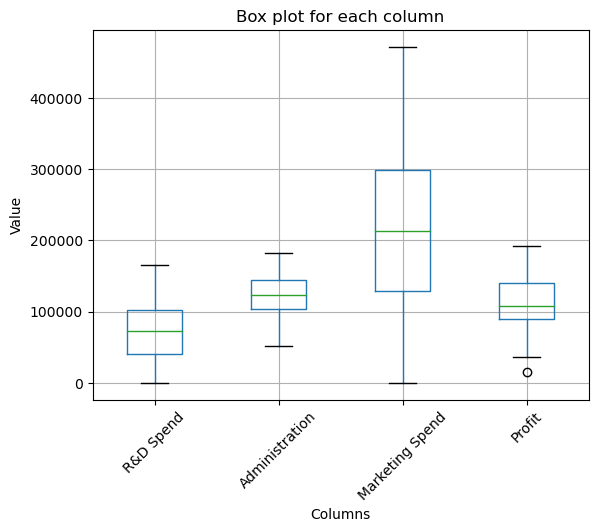

In [10]:
# Checking for outliers
df_numeric = df.drop(columns=["State"])

df_numeric.boxplot()
plt.title('Box plot for each column')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

- The dataset has no outliers present 

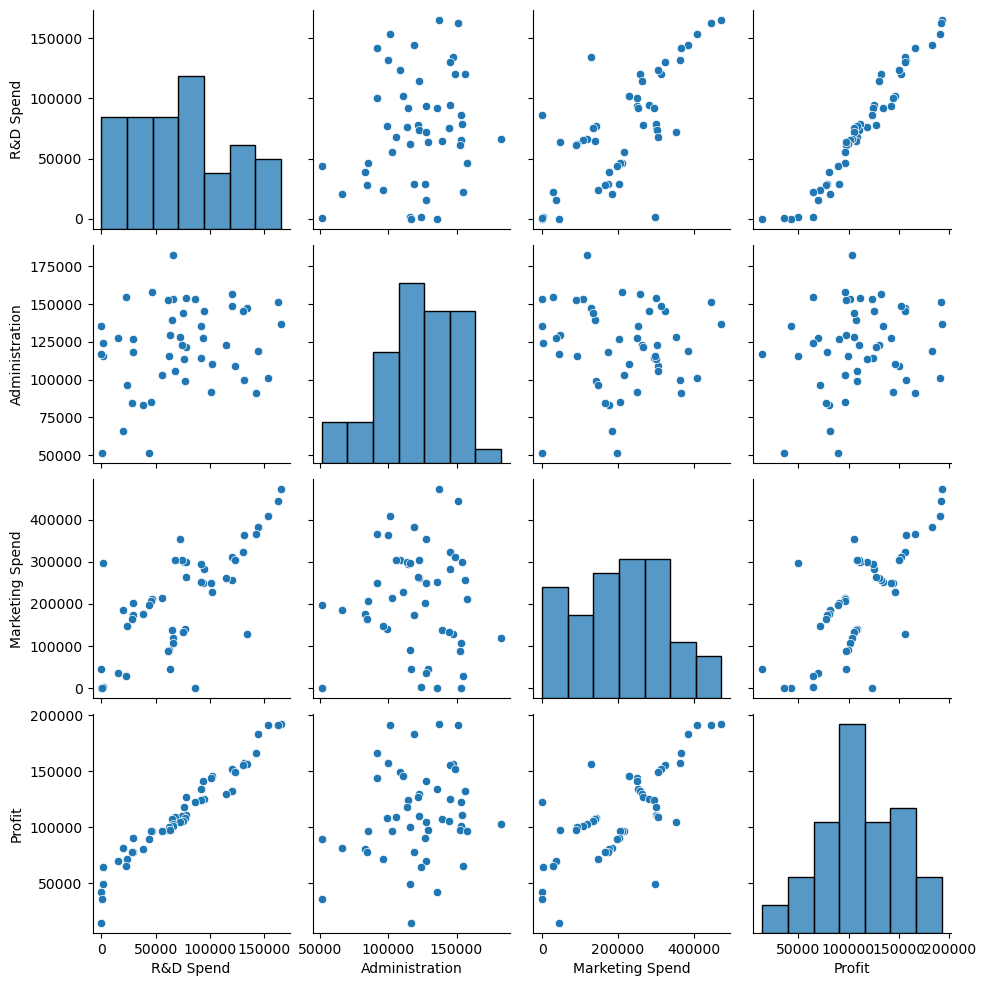

In [11]:
# Pairwise plot among all numerical columns
sns.pairplot(df)

Based on this plot R&D spend is mostly correlated with the Profit.
We can check the same using HeatMap 

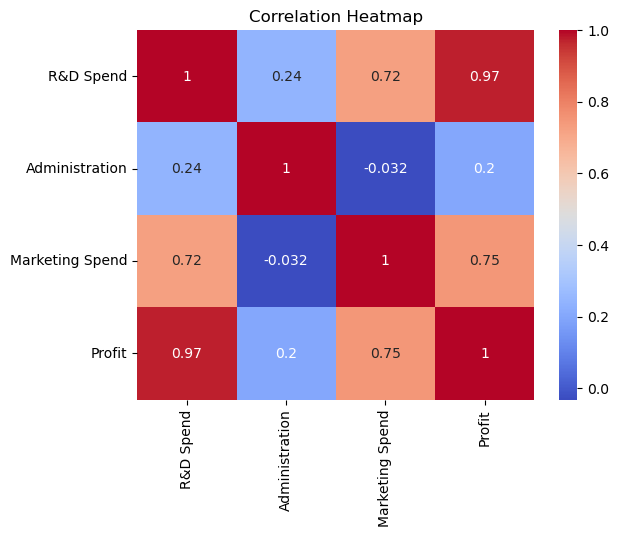

In [12]:
# HeatMAp used to find intercollinearity among numerical rows present in the dataset
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:ylabel='Density'>

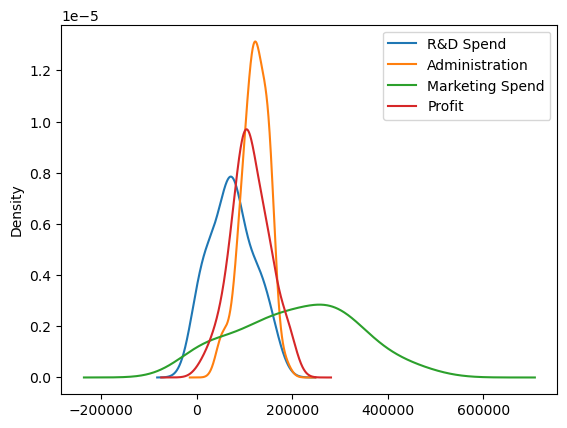

In [13]:
# Kernel Density Estimation : KDE is a non-parametric method for estimating the probability density function of a random variable
df.plot.kde()

- From the above plot its clear  that all numerical features are normally distributed

- Detailed analysis of outliers

<AxesSubplot:xlabel='Administration'>

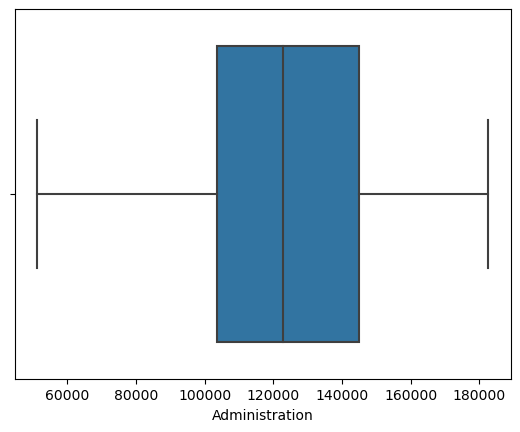

In [14]:
sns.boxplot(x=df['Administration'])

<AxesSubplot:xlabel='R&D Spend'>

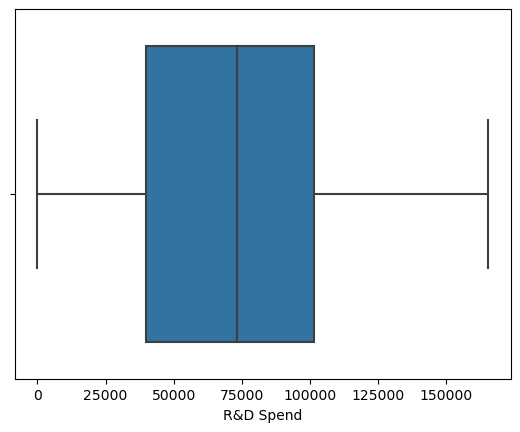

In [15]:
sns.boxplot(x=df['R&D Spend'])

<AxesSubplot:xlabel='R&D Spend', ylabel='State'>

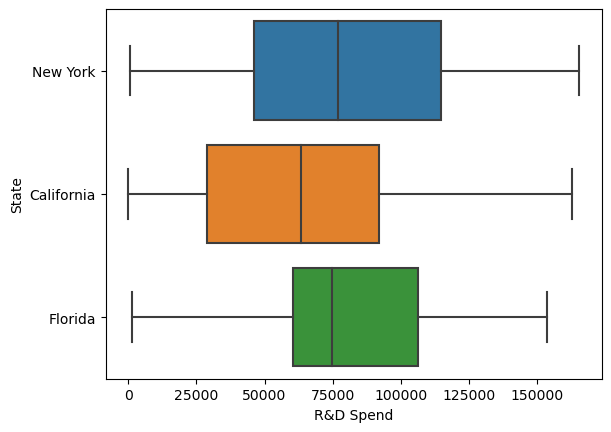

In [16]:
sns.boxplot(x=df['R&D Spend'],y=df['State'])

There are no outliers in the data

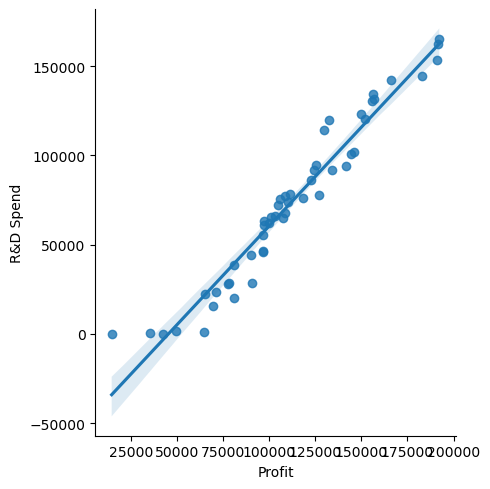

In [17]:
#lmplot used to create scatter plots with linear regression fits.

sns.lmplot(x='Profit',y='R&D Spend',data=df)

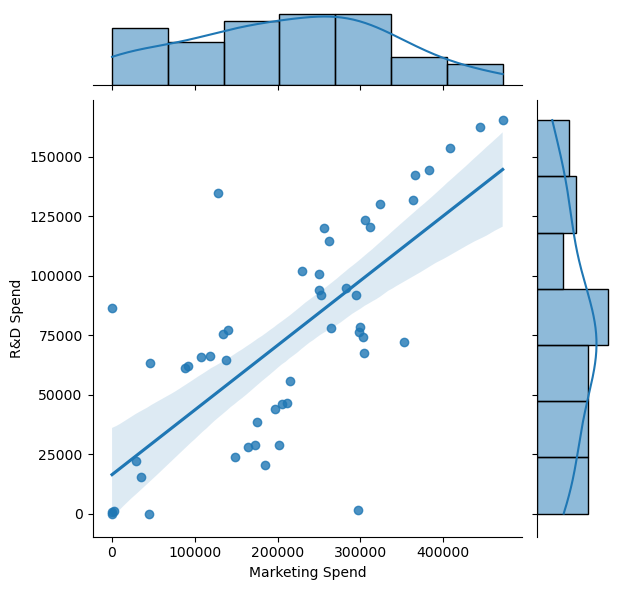

In [21]:
sns.jointplot(data=df, x="Marketing Spend", y="R&D Spend", kind="reg")

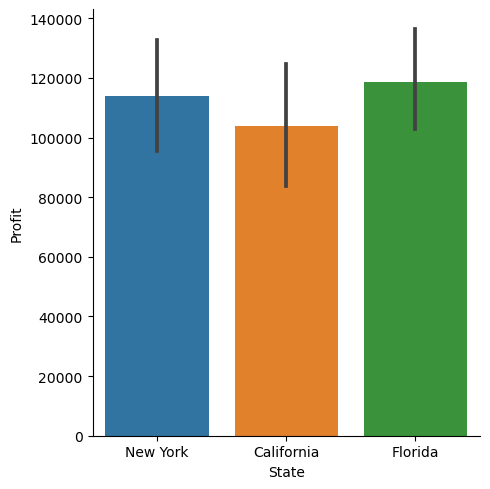

In [22]:
# Understandeing relationship b/w catergorical varibale 'State' and target variable 'Profit'
sns.catplot(x="State", y="Profit", kind="bar", data=df)

# Data Preparation

### Splitting the dataset into the Training set and Test set


In [23]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [24]:
df_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
33,55493.95,103057.49,214634.81,Florida,96778.92
35,46014.02,85047.44,205517.64,New York,96479.51
26,75328.87,144135.98,134050.07,Florida,105733.54
34,46426.07,157693.92,210797.67,California,96712.80
18,91749.16,114175.79,294919.57,Florida,124266.90


### Encoding

- The categorical column -'State' is encoded to numerical using OnehatEncoder and the reamining numerical are scaled using MinMaxScaler

In [25]:
numerical_columns = ['R&D Spend', 'Marketing Spend','Administration','Profit']
categorical_columns = ['State']

In [26]:
ct = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_columns),  # Apply MinMaxScaler to numerical columns
    ('cat', OneHotEncoder(), categorical_columns)  # Apply OneHotEncoder to categorical columns
], remainder='passthrough') # Keep remaining columns unchanged

df_train_transformed =ct.fit_transform(df_train)
df_test_transformed = ct.transform(df_test)


In [27]:
print(type(df_train_transformed))
print(type(df_test_transformed))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
# Convert the transformed arrays back to DataFrames
df_train = pd.DataFrame(df_train_transformed, columns=numerical_columns + ['encoded_' + col for col in ct.named_transformers_['cat'].get_feature_names_out()])
df_test = pd.DataFrame(df_test_transformed, columns=numerical_columns + ['encoded_' + col for col in ct.named_transformers_['cat'].get_feature_names_out()])

In [29]:
print(type(df_train))
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
df_train.describe()

,R&D Spend,Marketing Spend,Administration,Profit,encoded_State_California,encoded_State_Florida,encoded_State_New York
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.433406,0.428461,0.677641,0.533646,0.400000,0.250000,0.350000
std,0.282906,0.265022,0.246379,0.230775,0.496139,0.438529,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218371,0.259806,0.575948,0.411261,0.000000,0.000000,0.000000
50%,0.431999,0.441214,0.698439,0.525378,0.000000,0.000000,0.000000
75%,0.602505,0.630589,0.882500,0.666444,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Multiple Linear Regression**

**Multiple Linear Regression (MLR)** is a statistical method used to model the relationship between multiple independent variables and a single dependent variable. It extends the simple linear regression model to handle situations where more than one predictor variable influences the target variable.

- MLR is supervised Regression model used for dealing with linear entities (the variables that exhibit a linear realtionship)

### Initializing x_train , y_train

In [31]:
y_train = df_train['Profit']
X_train = df_train.drop(['Profit'],axis=1)

In [32]:
print(X_train.shape)
print(y_train.shape)

(40, 6)
(40,)


In [33]:
X_train.head()

,R&D Spend,Marketing Spend,Administration,encoded_State_California,encoded_State_Florida,encoded_State_New York
0,0.335617,0.454943,0.486552,0.0,1.0,0.0
1,0.278284,0.435618,0.317301,0.0,0.0,1.0
2,0.455574,0.284134,0.872589,0.0,1.0,0.0
3,0.280776,0.446810,1.000000,1.0,0.0,0.0
4,0.554881,0.625116,0.591036,0.0,1.0,0.0


In [34]:
y_train.head()

0    0.462312
1    0.460626
2    0.512737
3    0.461939
4    0.617103
Name: Profit, dtype: float64

### Training the Multiple Linear Regression model on the Training set

In [35]:
# Initialise teh Linear Regressor
linear_regressor = LinearRegression()

# Train the train data set 
linear_regressor.fit(X_train, y_train)

# Predict the y_train using X_train
y_train_pred = linear_regressor.predict(X_train)

# Calculate Residuals
res = (y_train - y_train_pred) 

##### Residual Analysis

Text(0.5, 0, 'Errors')

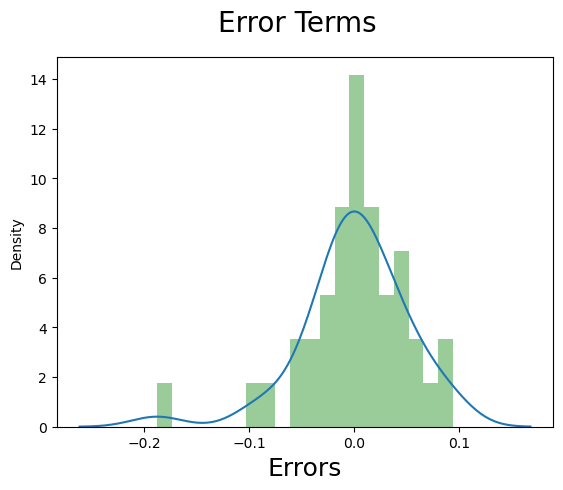

In [36]:
# Residual analysis - checking weather the error terms are normally distributed or not
fig = plt.figure()
sns.distplot(res, bins = 20,hist_kws={'color': 'green'})
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- The error terms are normally distributed

### Predicting the Test set results

In [37]:
# Initialize the X-test and y_test

y_test = df_test['Profit']
X_test = df_test.drop(['Profit'],axis=1)

In [38]:
# predict y_test using x_test
y_test_pred = linear_regressor.predict(X_test)

Text(0, 0.5, 'y_pred')

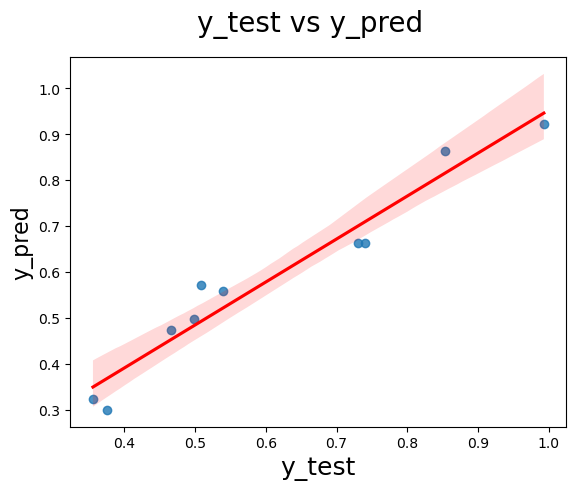

In [39]:
# Plot a scatter plot with predicted y value and test y value

fig = plt.figure()
sns.regplot(x=y_test,y= y_test_pred,data=df,line_kws={'color': 'red'})
fig.suptitle('y_test vs y_pred', fontsize = 20)     
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)     

### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [40]:
# Calculate the evaluation metrics

# The Coefficient of variables
print('Coefficient: ',linear_regressor.coef_)

# The intercept made by regression line 
print('Intercept: ' ,  linear_regressor.intercept_)

# Absolute Mean Error = |yobs-ypred|
print('Absolute MEan Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

# Mean Square Error = |yobs - ypred|^2
print("Mean Square Error(MSE): ",metrics.mean_squared_error(y_test, y_test_pred, squared=False))

# RMSE = rt(MSE)
print("Root MeanSquare Error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print()

# R2_score = 1- (RSS/TSS)
print("R2 Score: ",metrics.r2_score(y_test,y_test_pred))

Coefficient:  [ 7.20192994e-01  9.72631281e-02  1.97053001e-02  4.87882416e-04
 -4.91408761e-03  4.42620519e-03]
Intercept:  0.16596735725805262
Absolute MEan Error:  0.04231487478457284
Mean Square Error(MSE):  0.051458317522910246
Root MeanSquare Error(RMSE):  0.051458317522910246

R2 Score:  0.9347068473282426


### Building the model using StatsModel for summary

In [41]:
import statsmodels.api as sm


# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
linear_model = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained

linear_model.params

const                       0.124476
R&D Spend                   0.720193
Marketing Spend             0.097263
Administration              0.019705
encoded_State_California    0.041980
encoded_State_Florida       0.036578
encoded_State_New York      0.045918
dtype: float64

In [42]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.91e-21
Time:                        22:32:48   Log-Likelihood:                 62.390
No. Observations:                  40   AIC:                            -112.8
Df Residuals:                      34   BIC:                            -102.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- The p-value of `Administration` is high(.0.05) so it should be removed for better results

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,encoded_State_California,4.91
5,encoded_State_New York,4.49
4,encoded_State_Florida,4.07
0,R&D Spend,2.70
1,Marketing Spend,2.40
2,Administration,1.23


- The intercorelation /multicolinearity is less so the columns can be left alone

### Removing the 'Administration' variable and rebuilding the model

In [44]:
# Remove the "Administration" column from X_train and X_test
X_train_updated = X_train.drop(['Administration'],axis=1)
X_test_updated = X_test.drop(['Administration'],axis=1)

#  Retrain the Linear Regression model
linear_regressor_updated = LinearRegression()
linear_regressor_updated.fit(X_train_updated, y_train)

# Predict the y_train using X_test
y_train_pred_new = linear_regressor_updated.predict(X_train_updated)

# Calculate Residuals
res = (y_train - y_train_pred_new) # Residuals


Text(0.5, 0, 'Errors')

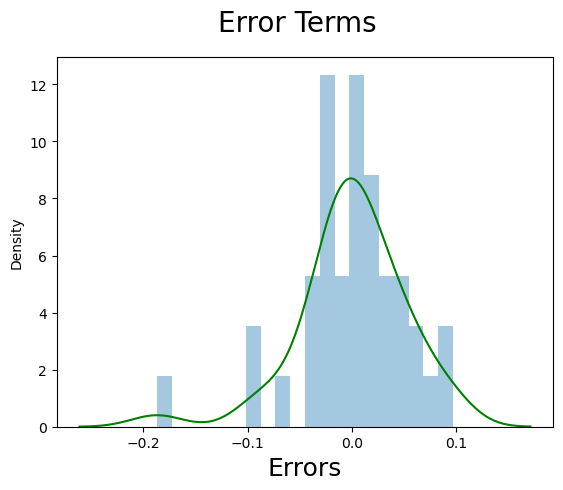

In [45]:
# Residual analysis - checking weather the error terms are normally distributed or not
fig = plt.figure()
sns.distplot(res, bins = 20,kde_kws={'color': 'green'})
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

- the error terms/ residuals are normally distributed

#### Evaluate the performance of updated model on test data

In [46]:
#  Evaluate the performance of the updated model
y_test_pred_new = linear_regressor_updated.predict(X_test_updated)

Text(0, 0.5, 'y_pred')

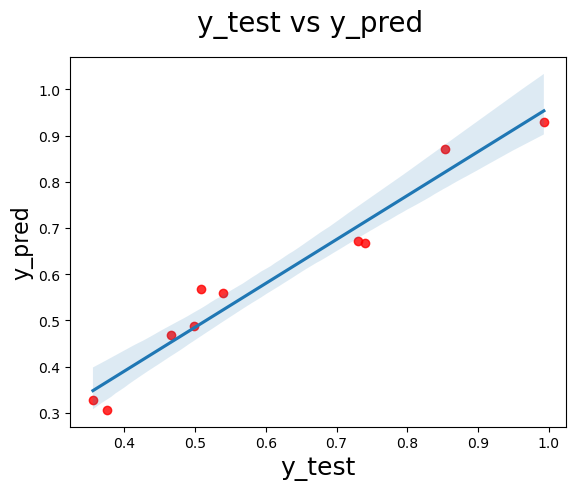

In [47]:
# Plot a scatter plot with predicted y value and test y value

fig = plt.figure()
sns.regplot(x=y_test,y= y_test_pred_new,data=df,scatter_kws={'color': 'red'}) # used for specifying the color of scatter plot
fig.suptitle('y_test vs y_pred', fontsize = 20)     
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)     

In [48]:
# Calculate the evaluation metrics

# The Coefficient of variables
print('Coefficient: ',linear_regressor_updated.coef_)

# The intercept made by regression line 
print('Intercept: ' ,  linear_regressor_updated.intercept_)

# Absolute Mean Error = |yobs-ypred|
print('Absolute MEan Error: ', metrics.mean_absolute_error(y_test, y_test_pred_new))

# Mean Square Error = |yobs - ypred|^2
print("Mean Square Error(MSE): ",metrics.mean_squared_error(y_test, y_test_pred_new, squared=False))

# RMSE = rt(MSE)
print("Root MeanSquare Error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_new)))

print()

# R2_score = 1- (RSS/TSS)
print("R2 Score: ",metrics.r2_score(y_test,y_test_pred_new))

Coefficient:  [ 7.31063411e-01  9.02131542e-02  5.10211675e-04 -4.14383809e-03
  3.63362642e-03]
Intercept:  0.17770571098352195
Absolute MEan Error:  0.0400334766484711
Mean Square Error(MSE):  0.04735835313888054
Root MeanSquare Error(RMSE):  0.04735835313888054

R2 Score:  0.9446968769427516


- Check for any redundant columns present/not

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_updated.columns
vif['VIF'] = [variance_inflation_factor(X_train_updated.values, i) for i in range(X_train_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,encoded_State_New York,2.23
1,Marketing Spend,2.22
0,R&D Spend,2.21
3,encoded_State_Florida,1.97
2,encoded_State_California,1.94


- No redundant columns are present 

###  Validating model using Statsmodel for evaluation metrics

In [50]:
import statsmodels.api as sm


# Add a constant
X_train_lm2 = sm.add_constant(X_train_updated)

# Create a first fitted model
linear_model_2 = sm.OLS(y_train, X_train_lm2).fit()

# Check the parameters obtained

linear_model_2.params

const                       0.133279
R&D Spend                   0.731063
Marketing Spend             0.090213
encoded_State_California    0.044937
encoded_State_Florida       0.040283
encoded_State_New York      0.048060
dtype: float64

In [51]:
print(linear_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.19e-22
Time:                        22:32:49   Log-Likelihood:                 62.246
No. Observations:                  40   AIC:                            -114.5
Df Residuals:                      35   BIC:                            -106.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **Insights from MLR Model**

MLR can be implemented either by using Sckit Learn / Stats Model

- Using Sckit learn we got r2_score around 0.94
- Using Stats Model we got r2_score around 0.95 


- This cost_function(r2_score) determines the quality of our multiple Linear Regression Model

# Random Forest Regression

**Random Forest Regression** is a popular ensemble learning method used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the average prediction of the individual trees for regression tasks.

- Random Forest is a supervised learning algorithm that utilizes the ensemble of decision trees to improve predictive performance and reduce overfitting.

## Data Preparation

### Splitting the dataset into the Training set and Test set


In [52]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [53]:
df_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
33,55493.95,103057.49,214634.81,Florida,96778.92
35,46014.02,85047.44,205517.64,New York,96479.51
26,75328.87,144135.98,134050.07,Florida,105733.54
34,46426.07,157693.92,210797.67,California,96712.80
18,91749.16,114175.79,294919.57,Florida,124266.90


### Encoding

In [54]:
numerical_columns = ['R&D Spend', 'Marketing Spend','Administration','Profit']
categorical_columns = ['State']

In [55]:
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_columns),  # Apply MinMaxScaler to numerical columns
    ('cat', OneHotEncoder(), categorical_columns)  # Apply OneHotEncoder to categorical columns
], remainder='passthrough') # Keep remaining columns unchanged

df_train_transformed =ct.fit_transform(df_train)
df_test_transformed = ct.transform(df_test)


In [56]:
print(type(df_train_transformed))
print(type(df_test_transformed))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [57]:
# Convert the transformed arrays back to DataFrames
df_train = pd.DataFrame(df_train_transformed, columns=numerical_columns + ['encoded_' + col for col in ct.named_transformers_['cat'].get_feature_names_out()])
df_test = pd.DataFrame(df_test_transformed, columns=numerical_columns + ['encoded_' + col for col in ct.named_transformers_['cat'].get_feature_names_out()])

In [58]:
print(type(df_train))
print(type(df_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [59]:
df_train.describe()

,R&D Spend,Marketing Spend,Administration,Profit,encoded_State_California,encoded_State_Florida,encoded_State_New York
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.433406,0.428461,0.677641,0.533646,0.400000,0.250000,0.350000
std,0.282906,0.265022,0.246379,0.230775,0.496139,0.438529,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218371,0.259806,0.575948,0.411261,0.000000,0.000000,0.000000
50%,0.431999,0.441214,0.698439,0.525378,0.000000,0.000000,0.000000
75%,0.602505,0.630589,0.882500,0.666444,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Initialising the target and predictor variable for train data set

In [60]:
y_train = df_train['Profit']
X_train = df_train.drop(['Profit'],axis=1)

In [61]:
print(X_train.shape)
print(y_train.shape)

(40, 6)
(40,)


In [62]:
X_train.head()

,R&D Spend,Marketing Spend,Administration,encoded_State_California,encoded_State_Florida,encoded_State_New York
0,0.335617,0.454943,0.486552,0.0,1.0,0.0
1,0.278284,0.435618,0.317301,0.0,0.0,1.0
2,0.455574,0.284134,0.872589,0.0,1.0,0.0
3,0.280776,0.446810,1.000000,1.0,0.0,0.0
4,0.554881,0.625116,0.591036,0.0,1.0,0.0


In [63]:
y_train.head()

0    0.462312
1    0.460626
2    0.512737
3    0.461939
4    0.617103
Name: Profit, dtype: float64

- All the above pre processing steps are same for both MLR and Random Forest

### Training the Random forest  model on training set

In [64]:
from sklearn.ensemble import RandomForestRegressor as RF
# Initialize the RandomForestRegressor 
rf_regressor = RF(n_estimators=500)

# Train teh data set
rf_regressor.fit(X_train, y_train)

# Predict the y_train using X_train
y_train_pred = linear_regressor.predict(X_train)

# # Calculate Residuals (ycal - ypred)
res = (y_train - y_train_pred) 

-  the parameter n_estimators specifies the number of decision trees that will be used in the ensemble. Each decision tree in the Random Forest is referred to as an estimator. 
- Therefore, n_estimators controls the size of the forest, or the number of trees in the ensemble.

**Residual Analysis**

Text(0.5, 0, 'Errors')

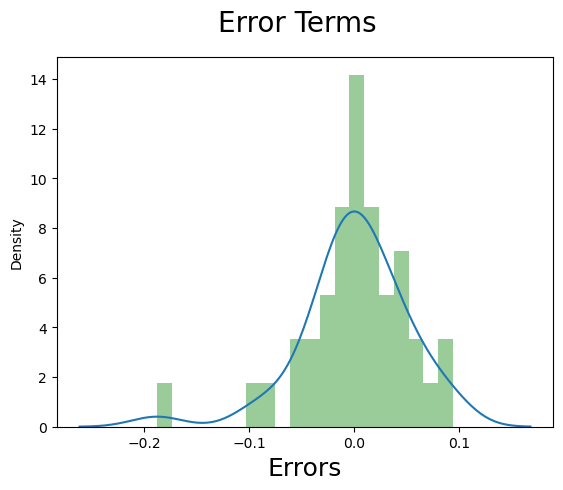

In [65]:
# Residual analysis - checking weather the error terms are normally distributed or not
fig = plt.figure()
sns.distplot(res, bins = 20,hist_kws={'color': 'green'})
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- The error terms are normally distributed

### Predicting the Test set results

In [66]:
# Initialize the X-test and y_test

y_test = df_test['Profit']
X_test = df_test.drop(['Profit'],axis=1)

In [67]:
# predict y_test using x_test
y_test_pred = rf_regressor.predict(X_test)

Text(0, 0.5, 'y_pred')

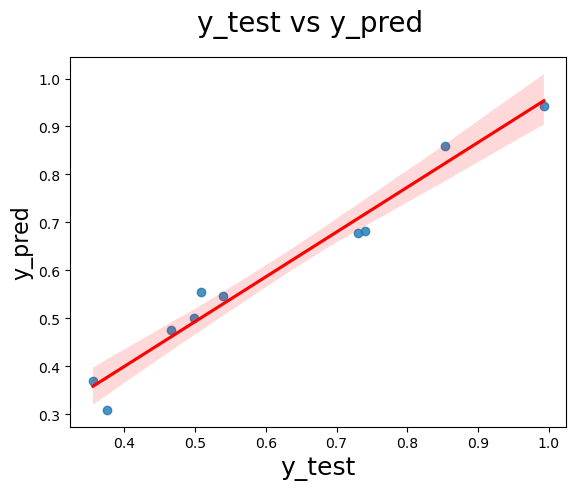

In [68]:
# Plot a scatter plot with predicted y value and test y value

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred,data=df, line_kws={'color': 'red'}) # used for specfying  the color of regressionline
fig.suptitle('y_test vs y_pred', fontsize = 20)     
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)     

### Evaluating the Model


In [69]:
# Calculate the evaluation metrics

# Absolute Mean Error = |yobs-ypred|
print('Absolute Mean Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

# Mean Square Error = |yobs - ypred|^2
print("Mean Square Error(MSE): ",metrics.mean_squared_error(y_test, y_test_pred, squared=False))

# RMSE = rt(MSE)
print("Root MeanSquare Error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print()

# R2_score = 1- (RSS/TSS)
print("R2 Score: ",metrics.r2_score(y_test,y_test_pred))

Absolute Mean Error:  0.03133570459312483
Mean Square Error(MSE):  0.039409202283800834
Root MeanSquare Error(RMSE):  0.039409202283800834

R2 Score:  0.9617041457050264


- The r2_score of `0.96` is really good which is significat measure the accuracy and correctness of our model

- Compared to MLR , with Random Forest the improved from 0.95 to `0.96`

- In the above case  using MLR we found that 'Administration' variable has high p -value . so following which we will be removing it and rebuildig the model

In [70]:
# Remove the "Administration" column from X_train and X_test
X_train_updated = X_train.drop(['Administration'],axis=1)
X_test_updated = X_test.drop(['Administration'],axis=1)

#  Retrain the Linear Regression model
rf_regressor_updated = RF(n_estimators=500)
rf_regressor_updated.fit(X_train_updated, y_train)


# Predict the y_train using X_test
y_train_pred_new = linear_regressor_updated.predict(X_train_updated)

# Calculate Residuals
res = (y_train - y_train_pred_new) 


Text(0.5, 0, 'Errors')

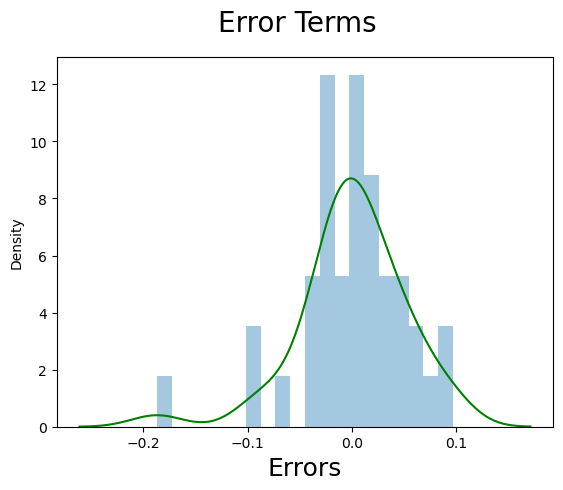

In [71]:
# Residual analysis - checking weather the error terms are normally distributed or not
fig = plt.figure()
sns.distplot(res, bins = 20,kde_kws={'color': 'green'})
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

- The error terms are normally distributed

#### Evaluate the performance of updated model on test data

In [72]:
#  Evaluate the performance of the updated model
y_test_pred_new = rf_regressor_updated.predict(X_test_updated)

Text(0, 0.5, 'y_pred')

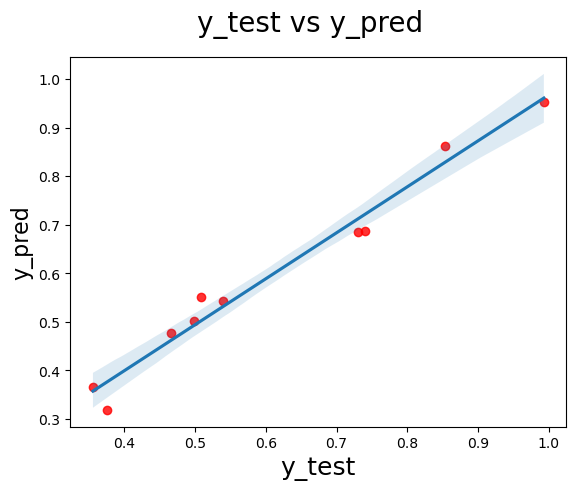

In [73]:
# Plot a scatter plot with predicted y value and test y value

fig = plt.figure()
sns.regplot(x=y_test, y= y_test_pred_new,data=df,scatter_kws={'color': 'red'})
fig.suptitle('y_test vs y_pred', fontsize = 20)     
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)     

### Evaluating the Model


In [74]:
# Calculate the evaluation metrics

# Absolute Mean Error = |yobs-ypred|
print('Absolute Mean Error: ', metrics.mean_absolute_error(y_test, y_test_pred_new))

# Mean Square Error = |yobs - ypred|^2
print("Mean Square Error(MSE): ",metrics.mean_squared_error(y_test, y_test_pred_new, squared=False))

# RMSE = rt(MSE)
print("Root MeanSquare Error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_new)))

print()

# R2_score = 1- (RSS/TSS)
print("R2 Score: ",metrics.r2_score(y_test,y_test_pred_new))

Absolute Mean Error:  0.027130412985260234
Mean Square Error(MSE):  0.03424444902903638
Root MeanSquare Error(RMSE):  0.03424444902903638

R2 Score:  0.9710840916050402


 - The r2_score slightly increased from 0.966 to 0.969 after removing the variable 'Administration'

 ## **Insights of RF Model**
 
- The RF is implemented using sckit learn library 

- The R2 score had a slight increase slight ater removing the redundant variables
 
- The accuracy of prediction using RF is more when compared to MLR

# Save the models for Inference

In [75]:
import joblib

#joblib.dump(scaler,"minmax_scaler.joblib")
#joblib.dump(ct, "col_transformer.joblib")
#joblib.dump(rf_regressor, "rf_regressor.joblib")
#joblib.dump(linear_regressor, "linear_regressor.joblib")


- These models will be further used while creating a interface using gradio for predicting the target variable

# User Interface using Gradio

In [76]:
import gradio as gr
import joblib
import warnings
warnings.filterwarnings('ignore')

In [77]:
# load models and transformer
ct = joblib.load("col_transformer.joblib")
linear_regressor = joblib.load("linear_regressor.joblib")
rf_regressor = joblib.load("rf_regressor.joblib")

In [78]:
def predict(R_and_D_Spending,	Administration,	Marketing_spending,	State, model = "Randomforest Regressor"):
    rdspending = int(R_and_D_Spending)
    admin = int(Administration)
    mspending = int(Marketing_spending)
    s = State

    inputs = ct.transform([[rdspending, admin, mspending, s]])
    print(inputs)

    if model == "Randomforest Regressor":
        print("Using Randomforest Regression")
        model = rf_regressor
    else:
        print("Using Linear Regression")
        model = linear_regressor
    output = model.predict(inputs)

    return output

In [79]:
demo = gr.Interface(
    title="Profit Prediction",
    fn=predict,
    inputs=[gr.Text(label='R_and_D_Spending'),
            gr.Text(label='Administration'),
            gr.Text(label='Marketing_spending'),
            gr.Dropdown(['New York', 'California', 'Florida']),
            gr.Dropdown(["Randomforest Regressor", "LInear Regrssor"])],
    outputs="number")



if __name__ == "__main__":
    demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://064f9c92acabd2c941.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusions

## 1. Project Outcomes 

- The main `aim` of the project is to `predict 'Profit'` obtained when a startup is placed in a particular 'State' with various factors effecting such as  'R&D Spend', 'MArketing Spend', 'Administration'

- The data set primarily has 5 variables - 'R&D Spend', 'MArketing Spend', 'Administration' , 'State' and 'Profit'

- The 'Profit' variable is taken as target variables -> predicted using other predictor variables 

- In the process 2 Models are used 
    - Multiple linear Regression
    - Random Forest Regression
    
- The quality of the model is checked using a mtreic(cost function) `R2_score`

- The MLR is implimented using 2 different     
    - Using Sckit Learn 
    We got a R-score around `0.94`
    - Using Stats Model
    We got around `0.95`
    
- With this we can conclude that MLR model gives good accuracy in predicting the target Variable

- The RF is implement using Sckit Learn library
    - Usinh which we got a final accuracy around `0.969`
    
- This score explains how good is our model in predicting the target variable

- Overall when compared to MLR , RF is used for providng better and more accurate resullts for predicting 'Profit'

## 2. Learning Outcomes

- Through this prject , I learnt in detail about machine learning algorithms such as `Multiple Linear Regression`, `Random Forest Regression`

**1.Multiple Linear Regression (MLR):**

    - Understanding how to implement MLR using both scikit-learn and StatsModels libraries.
    - Comparing the performance of MLR models using the R-squared metric.
    - Appreciating the differences between scikit-learn and StatsModels in terms of implementation & performance evaluation.

**2. Random Forest Regression (RF):**

    - Implementing Random Forest Regression using scikit-learn.
    - Evaluating the performance of the RF model using the R-squared metric.
    - Understanding how ensemble methods like Random Forest can improve predictive accuracy compared to simple linear regression models.

**3. Evaluation Metrics:**

    - Understanding the importance of evaluation metrics like R-squared, RSS, MSE,RMSE in assessing model performance.
    - Interpreting R-squared scores to gauge the goodness-of-fit of regression models.

**4. ColumnTransformer:**

    - Learning how to preprocess data using ColumnTransformer to handle categorical and numerical variables simultaneously.
    - Understanding the purpose and usage of ColumnTransformer in machine learning pipelines.
    - Function of 'OneHotEncoder' used during conversion of categorical variables to numerical Variables

**5. Gradio Library:**

    - Introduction to Gradio library for building interactive web interfaces for machine learning models.
    - Understanding how to use Gradio to create user-friendly interfaces for model predictions.
    - Exploring different input and output components provided by Gradio for model interaction.
